# X-Ray Absorption Spectra Using BSE
**by <span style="color:darkgreen">Christian Vorwerk</span>, <span style="color:darkgreen">Caterina Cocchi</span>, & <span style="color:darkgreen">Keith Gilmore</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Megha Arya</span> and <span style="color:darkgreen">Mara Voiculescu</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial, we present an example of the calculation of the **X-ray** absorption near-edge structure (**XANES**) spectra by solving the Bethe-Salpeter equation (**BSE**). For this purpose, we show the examples of the N **K**-edge in cubic boron-nitride, as well as of the Ti **L<sub>2,3</sub>**-edge in rutile titanium dioxide.

<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">
    
**Table of Contents**

[0. Before Starting](#0)
    
[1. Introduction](#1)
    
[2. The N-K Edge in Cubic Boron Nitride](#2)
    
  - [Exercise 1](#3)
    
[3. The Ti L2,3-Edge in Rutile TiO2](#4)
    
  - [Preparation of the Input File and Ground-State Calculation](#4)
  - [Calculation of XANES Spectra and Core-Exciton Output](#5)
  - [Exercise 2](#6)

</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Introduction</span>

The approach to calculate core spectra from the solution of the Bethe-Salpeter equation (**BSE**) in **exciting** is very similar to the approach to optical spectra described in the tutorial **Excited states from BSE**. The main difference resides in the initial states of the transitions, which are **core states**. As such, they are solutions of the radial Dirac equation in the muffin-tin spheres.

A description of the basic setup for **BSE** calculations can be found in **Excited states from BSE**. In addition, all the input parameters are described in **[Input Reference](https://www.exciting-code.org/home/about/input-reference)**. Note that, in order to obtain reliable **X-ray** absorption spectra, the calculation needs to be converged with respect to several parameters, such as the size of the **k**-mesh.

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. The N-K Edge in Cubic Boron Nitride</span>

Here, we consider the N **K**-edge in c-BN. As a first step, create a new directory for running the tutorial, as well as a subdirectory which you can call, *e.g.*, **BN-XANES**.

In [5]:
%%bash
mkdir -p run_XANES && cd run_XANES
mkdir -p BN-XANES
cd ..

We start with a ground-state calculation of c-BN. Below is an example of the corresponding input file, which should be saved in the working directory.

<span class="BN_GS"></span>
```xml
<input>
 
   <title>Cubic boron nitride: Ground-State Calculation</title>
 
   <structure autormt="true" speciespath="$EXCITINGROOT/species">
      <crystal scale="6.83136">
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
         <basevect>0.5 0.5 0.0</basevect>
      </crystal>
      <species speciesfile="B.xml" >
         <atom coord="0.00 0.00 0.00" />
      </species>
      <species speciesfile="N.xml">
         <atom coord="0.25 0.25 0.25" />
      </species>
   </structure>
 
   <groundstate 
      ngridk="4 4 4"
      xctype="GGA_PBE_SOL"
      gmaxvr="14.0" />
 
</input>

```

In [4]:
import os
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("03_tutorial_xray_absorption_spectra_using_bse", "BN_GS")

# Write out the input as an XML file:
with open('./run_XANES/BN-XANES/input.xml', "w") as fid:
    fid.write(input_str)

Replace the **$EXCITINGROOT** variable with the correct path by using the command:

In [18]:
%%bash
cd run_XANES/BN-XANES
python3 -m excitingscripts.setup.excitingroot
cd ../..

Run the ground-state calculation with the usual command:

In [4]:
%%bash
cd run_XANES/BN-XANES
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ../..

 ### Using specified input file: input.xml


   Elapsed time = 0m19s


After the ground-state calculation is completed, we inspect the output file **EVALCORE.OUT**, which contains the information about core electrons. Since we are interested here in the excitations from the Nitrogen **K**-edge, we have to look specifically for the N **1*s*** electron. For this purpose we have to consider the core state with quantum numbers ***n*=1** and ***l*=0**:

```
Species :    2 (N), atom :    1
 n =  1, l =  0, k =  1 :   -13.38038902
```

From the file **EVALCORE.OUT** we obtain the information that the N **1*s*** electron in cubic BN has an energy of about -13.38 Ha. With this knowledge, we can add to the input file the parameters required to perform a **XANES** calculation. Since we are dealing with excited-state properties, we have to insert the <code><span style="color:green">xs</span></code> element inside the <code><span style="color:green">input</span></code> element. Do not forget to skip the ground-state run by inserting the attribute <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> inside the <code><span style="color:green">groundstate</span></code> element.

```xml
...
   <xs
      xstype="BSE" 
      ngridk="2 2 2" 
      vkloff="0.05 0.15 0.25"
      ngridq="2 2 2"
      nempty="30" 
      gqmax="3.0" 
      broad="0.018"
      tevout="true" >
 
      <energywindow 
         intv="13.4 16.5" 
         points="1500" />
 
      <screening 
         screentype="full" 
         nempty="100" />
 
      <BSE 
         xas="true"
         xasspecies="2"
         xasatom="1"
         xasedge="K"
         bsetype="singlet" 
         nstlxas="1 15" />
 
      <qpointset>
         <qpoint>0.0 0.0 0.0</qpoint>
      </qpointset>
 
   </xs>
...
```

In [10]:
# The following lines modify the input.xml using Python
from excitingtools import ExcitingInputXML, ExcitingXSInput

parsed_input = ExcitingInputXML.from_xml('./run_XANES/BN-XANES/input.xml')

xs = {'xstype': 'BSE', 'ngridk': [2, 2, 2], 'vkloff': [0.05, 0.15, 0.25], 'ngridq': [2, 2, 2], 'nempty': 30,
      'gqmax': 3.0, 'broad': 0.018, 'tevout': True, 'energywindow': {'intv': [13.4, 16.5], 'points': 1500},
      'screening': {'screentype': 'full', 'nempty': 100},
      'BSE': {'xas': True, 'xasspecies': 2, 'xasatom': 1, 'xasedge': 'K', 'bsetype': 'singlet', 'nstlxas': [1, 15]},
      'qpointset': [[0.0, 0.0, 0.0]]}

parsed_input.xs = ExcitingXSInput(**xs)
parsed_input.groundstate.do = "skip"

parsed_input.write('./run_XANES/BN-XANES/input.xml')

You should be already familiar with many parameters shown above. However, it is useful to highlight a few points here:

- The element <code><span style="color:green">energywindow</span></code> is now chosen from 13.4 to 16.5 Ha. This is consistent with the energy of the N 1s state, which represents the investigated absorption edge.
- The attribute <code><span style="color:mediumblue">xas</span>=<span style="color:firebrick">"true"</span></code> in the <code><span style="color:green">BSE</span></code> element triggers the core-level calculation.
- The attributes <code><span style="color:mediumblue">xasspecies</span></code>, <code><span style="color:mediumblue">xasatom</span></code>, and <code><span style="color:mediumblue">xasedge</span></code> uniquely define the initial states of the transition. In our case, we choose <code><span style="color:mediumblue">xasspecies</span>=<span style="color:firebrick">"2"</span></code> to select Nitrogen, <code><span style="color:mediumblue">xasatom</span>=<span style="color:firebrick">"1"</span></code> to identify the one and only N atom in the unit cell, and the <code><span style="color:mediumblue">xasedge</span>=<span style="color:firebrick">"K"</span></code> to specify that we are performing a **K**-edge calculation.
- The attribute <code><span style="color:mediumblue">nstlxas</span></code> describes the number of unoccupied states used in the **BSE**-Hamiltonian counting from the lowest unoccupied band. Setting it to <code><span style="color:mediumblue">nstlxas</span>=<span style="color:firebrick">"1 15"</span></code>, we use the lowest 15 unoccupied bands in the calculation.

We are now ready to run the calculation with the usual command. 

In [3]:
%%bash
cd run_XANES/BN-XANES
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ../..

 ### Using specified input file: input.xml


   Elapsed time = 0m30s


The calculation will run for a few seconds. You can follow the progress on the shell, as described in the Tutorial **Excited states from BSE**. The produced output is organized as in **BSE** calculations run in the optical region (see **Excited states from BSE**). A number of files are printed in the working directory. Among them, the file **INFOXS.OUT** shows the general messages for the calculation procedure. The physically relevant output quantities are included in the sub-folders named **<span style="color:mediumblue">EPSILON</span>**, **<span style="color:mediumblue">EXCITON</span>**, and **<span style="color:mediumblue">LOSS</span>**. Since we are interested in the X-ray absorption spectrum of cubic-BN, given by the imaginary part of the dielectric function, we look at the results contained in the **<span style="color:mediumblue">EPSILON</span>** folder and execute the following commands:

In [4]:
%%bash
cd run_XANES/BN-XANES
cp EPSILON/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT singlet-TDA
python3 -m excitingscripts.plot.files -f singlet-TDA  -lx 'Energy [eV]'  -ly 'Im $\varepsilon_M$'  -t 'Macroscopic dielectric function'  -g  -rc  -cy 3  -nl
cd ../..

The result is stored in **PLOT.png** resemble this plot:

<figure>
<img src=" 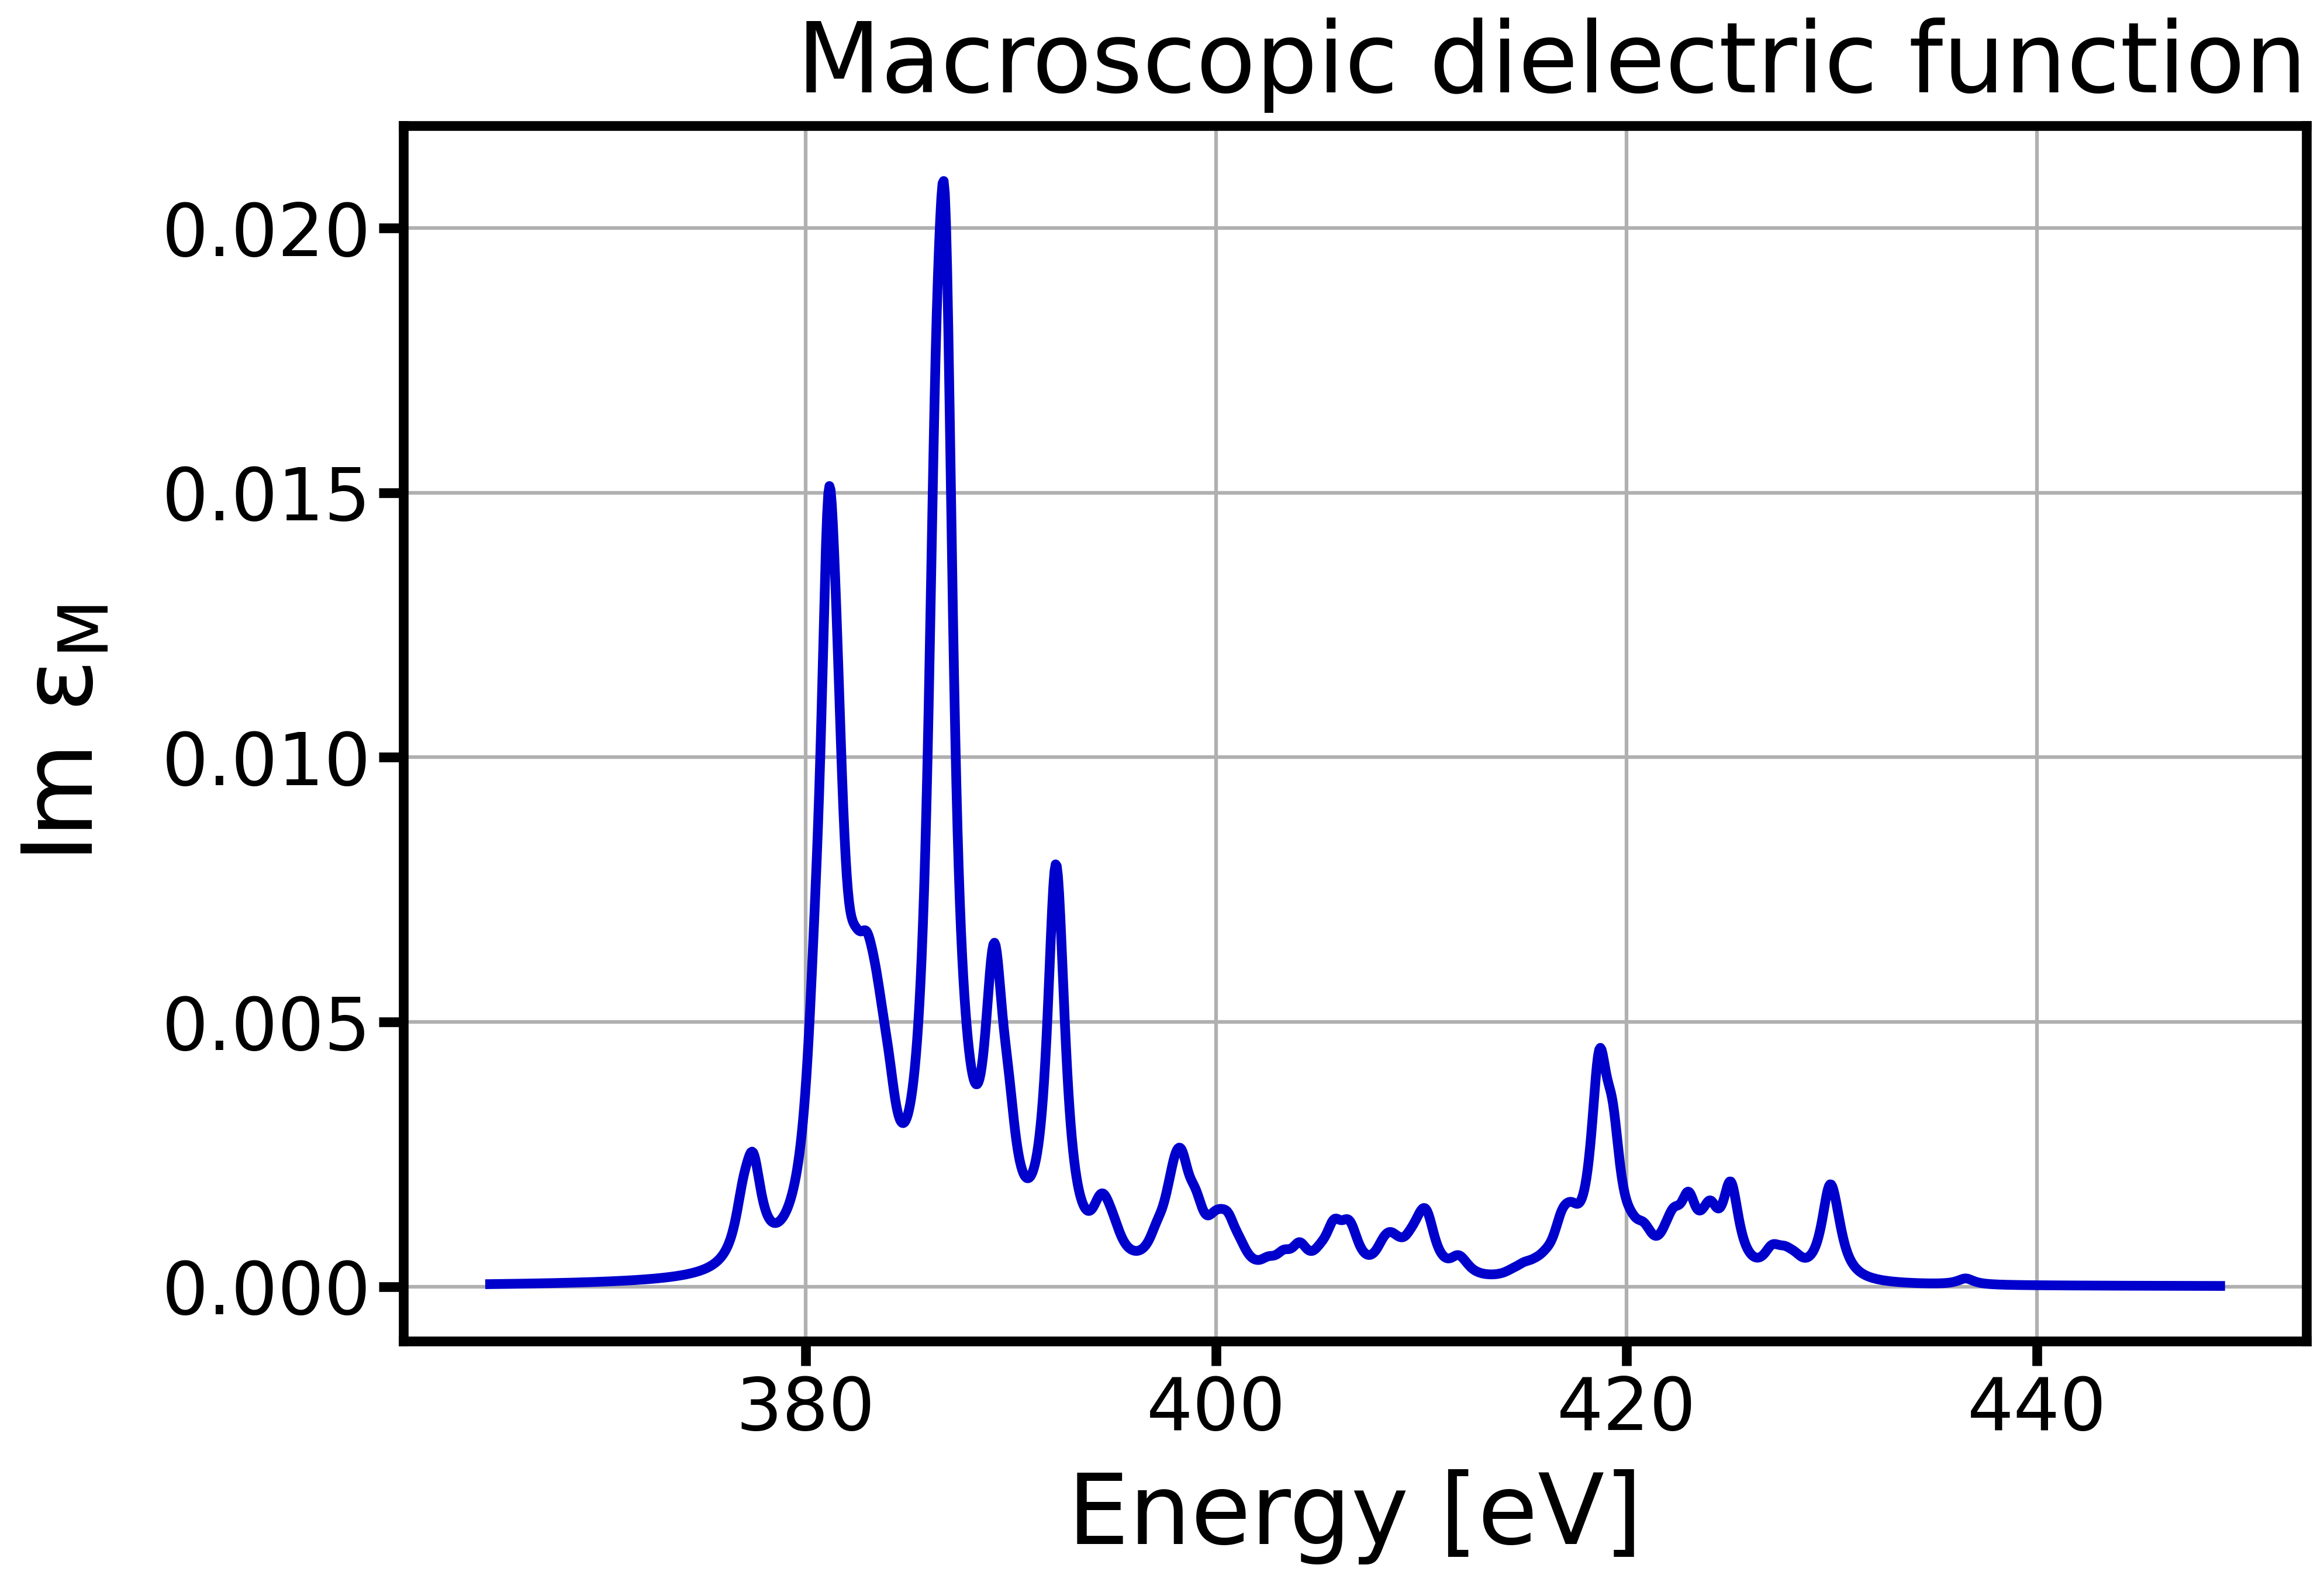" width="600" align="left"/>
</figure>

<a id='3'></a>
**<span style="color:green">Exercise 1</span>**

- Calculate the N **K**-edge spectra in the random-phase approximation (**RPA**) by setting the parameter <code><span style="color:mediumblue">bsetype</span>=<span style="color:firebrick">"RPA"</span></code>. Compare the spectra of the **BSE** and the **RPA** calculation.
- Calculate the boron **K**-edge in c-BN.

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. The Ti L<sub>2,3</sub>-Edge in Rutile TiO<sub>2</sub></span>

**i) Preparation of the Input File and Ground-State Calculation**

As the next example, we will calculate the Ti **L<sub>2,3</sub>**-edge XANES of the rutile phase of TiO2. Before, create a new directory named **TiO2-XANES**.

In [1]:
%%bash
cd run_XANES
mkdir -p TiO2-XANES
cd ..

In the standard notation, exciting the Ti **L<sub>2,3</sub>**-edge in rutile TiO2 corresponds to considering transitions from all the Ti ***2p*** states. First, we need to make sure that the initial states are treated as core states in **`exciting`**. 

Therefore, we look at the species file **$EXCITINGROOT/species/Ti.xml**.

In [2]:
!cat $EXCITINGROOT/species/Ti.xml

<?xml version="1.0" encoding="UTF-8"?>
<spdb xsi:noNamespaceSchemaLocation="../../xml/species.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <sp chemicalSymbol="Ti" name="titanium" z="-22.0000" mass="87256.20311">
    <muffinTin rmin="0.100000E-04" radius="2.0000" rinf="25.7965" radialmeshPoints="350"/>
    <atomicState n="1" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="0" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="2" occ="4.00000" core="true"/>
    <atomicState n="3" l="0" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="3" l="1" kappa="1" occ="2.00000" core="false"/>
    <atomicState n="3" l="1" kappa="2" occ="4.00000" core="false"/>
    <atomicState n="3" l="2" kappa="2" occ="2.00000" core="false"/>
    <atomicState n="4" l="0" kappa="1" occ="2.00000" core="false"/>
    <basis>
      <default type="lapw" trialEnergy="0.1500" searchE="fal

You will see on the screen a list of atomic states. We are interested in the first few lines. The 2*p*-electrons, given by

```xml
...
    <atomicState n="2" l="1" kappa="1" occ="2.00000" core="true"/>
    <atomicState n="2" l="1" kappa="2" occ="4.00000" core="true"/>
...
```

are indeed treated as core states. In fact, in both lines <code><span style="color:green">atomicState</span></code>, the attribute <code><span style="color:mediumblue">core</span></code> is set to **"true"**. The two different atomic states correspond to the Ti 2*p*<sub>1/2</sub> and Ti 2*p*<sub>3/2</sub> states, respectively.

The file below is an example input file for performing the ground-state calculation on rutile TiO<sub>2</sub>.

<span class="TiO2_GS"></span>
```xml
<input>
 
   <title>TiO2: Ground-State Calculation</title>
 
   <structure speciespath="$EXCITINGROOT/species">
      <crystal>
         <basevect>   8.763555397       0.000000000       0.000000000</basevect>
         <basevect>   0.000000000       8.763555397       0.000000000</basevect>
         <basevect>   0.000000000       0.000000000       5.610015465</basevect>
      </crystal>
      <species speciesfile="O.xml" rmt="1.8000">
         <atom coord="0.3050853616      0.3050853616      0.0000000000"/>
         <atom coord="0.6949146384      0.6949146384      0.0000000000"/>
         <atom coord="0.1949146384      0.8050853616      0.5000000000"/>
         <atom coord="0.8050853616      0.1949146384      0.5000000000"/>
      </species>
      <species speciesfile="Ti.xml" rmt="1.8000">
         <atom coord="0.0000000000      0.0000000000      0.0000000000"/>
         <atom coord="0.5000000000      0.5000000000      0.5000000000"/>
      </species>
   </structure>
 
   <groundstate 
      rgkmax="7.0"
      ngridk="4 4 6"
      xctype="GGA_PBE_SOL"
      epsocc="1.0d-6">
   </groundstate>
 
</input>
```

In [16]:
# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("03_tutorial_xray_absorption_spectra_using_bse", "TiO2_GS")

# Write out the input as an XML file:
with open('./run_XANES/TiO2-XANES/input.xml', "w") as fid:
    fid.write(input_str)

Replace the **$EXCITINGROOT** variable with the correct path by using the command:

In [17]:
%%bash
cd run_XANES/TiO2-XANES
python3 -m excitingscripts.setup.excitingroot
cd ../..

To run the calculation, invoke the **`exciting`** executable:

In [18]:
%%bash
cd run_XANES/TiO2-XANES
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ../..

 ### Using specified input file: input.xml


   Elapsed time = 1m24s


Once the calculation is finished, we can identify the Ti ***2p*** states in the output file **EVALCORE.OUT**, and with them determine the <code><span style="color:green">energywindow</span></code> for the **XANES** calculation. To do so, we open **EVALCORE.OUT** and look for the following lines:
```
Species :    2 (Ti), atom :    1
 n =  1, l =  0, k =  1 :   -178.2875233    
 n =  2, l =  0, k =  1 :   -19.33482211    
 n =  2, l =  1, k =  1 :   -16.08151434    
 n =  2, l =  1, k =  2 :   -15.86989439
``` 

<a id='5'></a>
The core levels we are interested in are ***2p*** states, which have principal quantum number ***n=2***, and angular quantum number ***l=1***. $\kappa$ is a unique combination of the quantum numbers ***l*** and ***J*** given by

$$\kappa = \begin{equation}
\left\{ 
  \begin{aligned}
    -l-1\,for\,J=l+\frac{1}{2}\\
    l\,for\,J=l-\frac{1}{2}  \\
  \end{aligned}
  \right.
\end{equation}
$$

The Ti **2*p<sub>1/2</sub>*** states ($\kappa$=**1**) are at about -16.1 Ha and the Ti **2*p<sub>3/2</sub>*** ones ($\kappa$=**-2**) are at about -15.87 Ha. Thus, we define the energy window for our XANES by setting <code><span style="color:green">energywindow</span></code> = **"15.0 18.0"**.

**ii) Calculation of XANES Spectra and Core-Exciton Output**

Now we can start the XANES calculation by adding the <code><span style="color:green">xs</span></code> element to the input file. Remember to set the attribute <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> inside the element <code><span style="color:green">groundstate</span></code> to skip the ground-state calculation.

```xml
... 
   <xs
      xstype="BSE" 
      ngridk="2 2 3"
      ngridq="2 2 3"
      rgkmax="7.0" 
      vkloff="0.05 0.15 0.25"
      nempty="30" 
      gqmax="1.0" 
      broad="0.018"
      tevout="true" >
 
      <energywindow 
         intv="15.0 18.0" 
         points="1500" />
      <screening 
         screentype="full" 
         nempty="75" />
      <BSE
         xas="true"
         xasspecies="2"
         xasatom="2"
         xasedge="L23" 
         bsetype="singlet"  
         nstlxas="1 20" />
      <qpointset>
         <qpoint>0.0 0.0 0.0</qpoint>
      </qpointset>
   </xs>
...
```

In [19]:
# The following lines modify the input.xml using Python
parsed_input = ExcitingInputXML.from_xml('./run_XANES/TiO2-XANES/input.xml')

xs = {'xstype': 'BSE', 'ngridk': [2, 2, 3], 'ngridq': [2, 2, 3], 'rgkmax': 7.0, 'vkloff': [0.05, 0.15, 0.25],
      'nempty': 30, 'gqmax': 1.0, 'broad': 0.018, 'tevout': True,
      'energywindow': {'intv': [15.0, 18.0], 'points': 1500},
      'screening': {'screentype': 'full', 'nempty': 75},
      'BSE': {'xas': True, 'xasspecies': 2, 'xasatom': 2, 'xasedge': 'L23', 'bsetype': 'singlet',
              'nstlxas': [1, 20]}, 'qpointset': [[0.0, 0.0, 0.0]]}

parsed_input.xs = ExcitingXSInput(**xs)
parsed_input.groundstate.do = "skip"

parsed_input.write('./run_XANES/TiO2-XANES/input.xml')

We can now again run the calculation with the usual command. 

In [20]:
%%bash
cd run_XANES/TiO2-XANES
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ../..

 ### Using specified input file: input.xml


   Elapsed time = 1m21s


Once the calculation is finished (it will take slightly longer than the one on c-BN above), we can inspect the computed **XANES** spectra. To do so, as usual, we consider the imaginary part of the dielectric function, which is included in the **<span style="color:mediumblue">EPSILON</span>** folder. 

In [21]:
%%bash
cd run_XANES/TiO2-XANES
cp EPSILON/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT singlet-TDA
python3 -m excitingscripts.plot.files -f singlet-TDA  -lx 'Energy [eV]'  -ly 'Im $\varepsilon_M$'  -t 'Macroscopic dielectric function'  -x 420 470  -g  -rc  -cy 3  -nl
cd ../..

The resulting plot should look like this:

<figure>
<img src=" 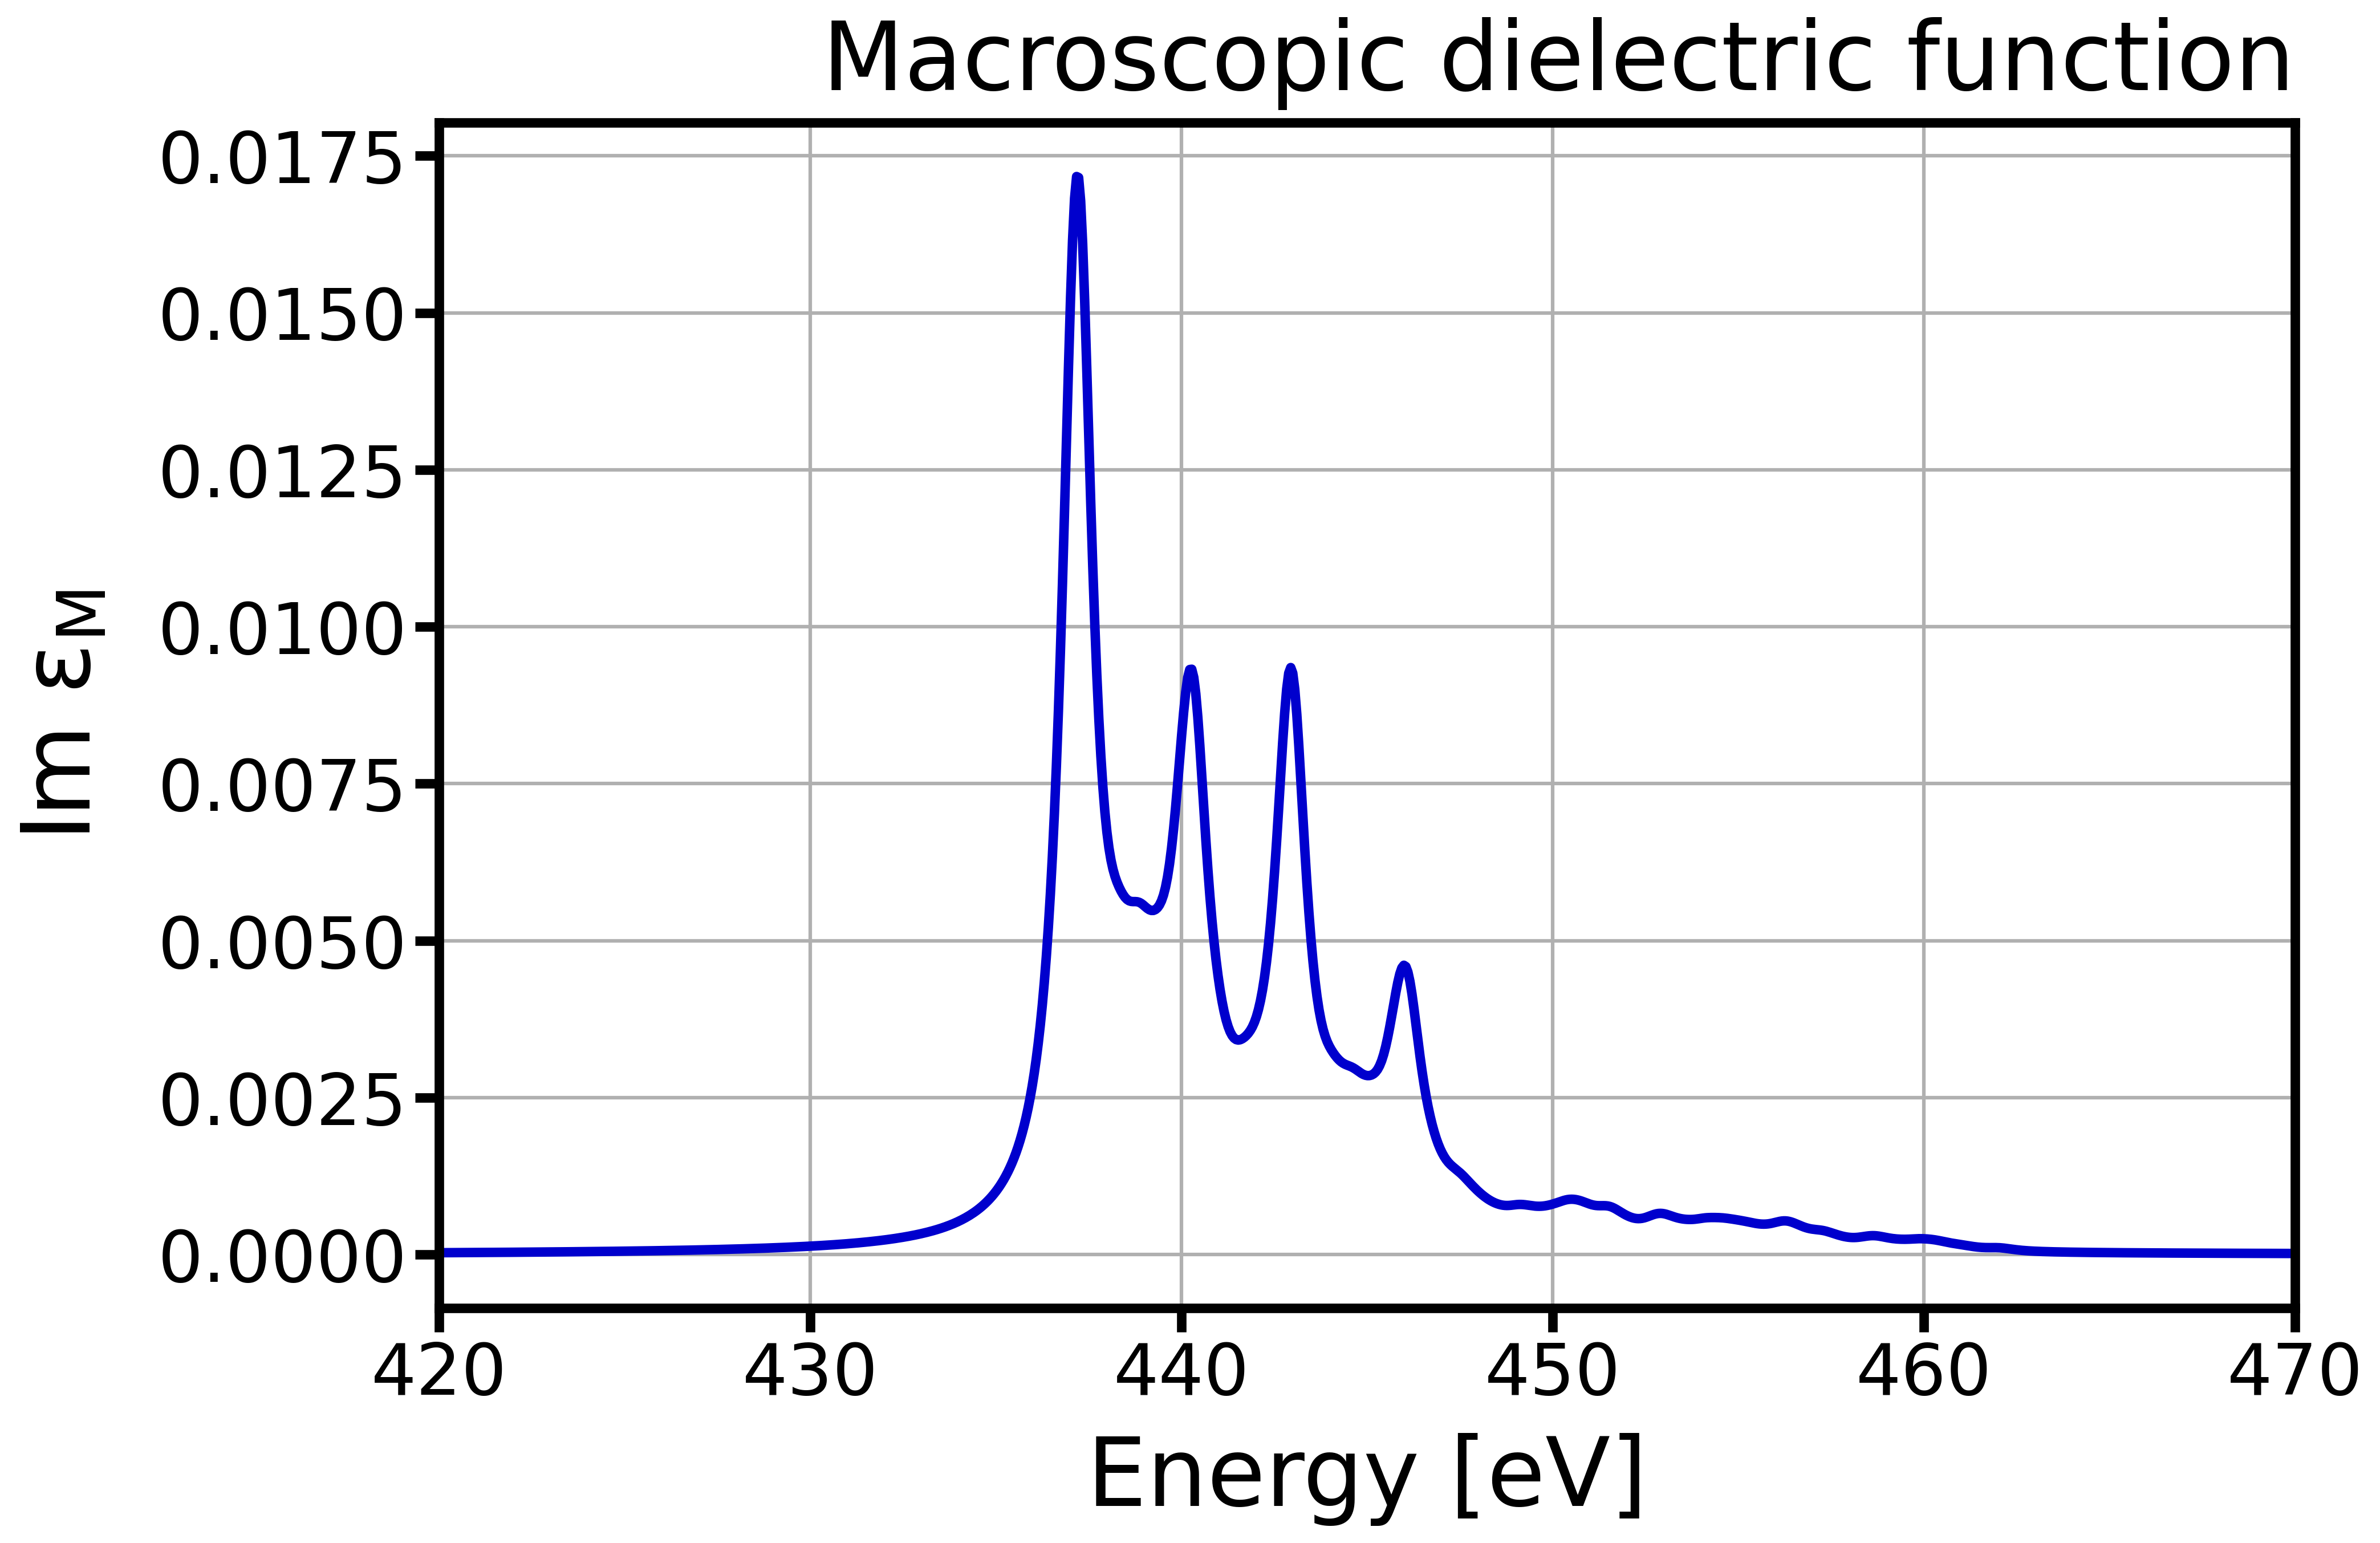" width="600" align="left"/>
</figure>

<a id='6'></a>
**<span style="color:green">Exercise 2</span>**

- Perform a **RPA** calculation (<code><span style="color:mediumblue">bsetype</span>=<span style="color:firebrick">"RPA"</span></code>).
- Plot **RPA** absorption spectra, *e.g.*, using **EPSILON_BSE-RPA-TDA-BAR_SCR-full_OC11.OUT.xml** inside the **<span style="color:mediumblue">EPSILON</span>** subfolder and compare with the spectrum previously calculated from the full **BSE**. How do the spectra differ? Why?
- Search for bound core-exciton states in the file **EXCITON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT** inside the **<span style="color:mediumblue">EPSILON</span>** subfolder.
- Calculate the **L<sub>2</sub>** and **L<sub>3</sub>** subedges by setting the <code><span style="color:mediumblue">xasedge</span></code> attribute to **"L2"** and **"L3"**, respectively. Plot the different spectra in one plot. (**<span style="color:green">Suggestion</span>**: Copy the **<span style="color:mediumblue">EPSILON</span>** directory containing the **"L23"** results to **<span style="color:mediumblue">EPSILON-L23</span>**. Repeat the same procedure after the **"L2"** calculation to produce **<span style="color:mediumblue">EPSILON-L2</span>** and after the **"L3"** calculation to produce **<span style="color:mediumblue">EPSILON-L3</span>**). How do the three spectra differ? Why?


<hr style="border:1px solid #DDD"> </hr>
<details>
<summary><span style="color:firebrick"><strong>$\Rightarrow$ Solution: L2 and L3 spectra</strong></span></summary>

To plot all spectra in one plot, execute the following command in the working directory **TiO2-XANES**:

```bash
cp EPSILON-L23/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT singlet-L23
cp EPSILON-L2/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT singlet-L2
cp EPSILON-L3/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT singlet-L3
```

Then, run the script **`excitingscripts.plot.files`** with the following options:
    
```bash
python3 -m excitingscripts.plot.files -f singlet-L2 singlet-L23 singlet-L3  -lx 'Energy [eV]'  -ly 'Im $\varepsilon_M$'  -t 'Macroscopic dielectric function'  -x 420 470  -g  -rc  -cy 3  -lp 1
```

The resulting plot (**PLOT.png**) should look like this

<div>
<img src=" 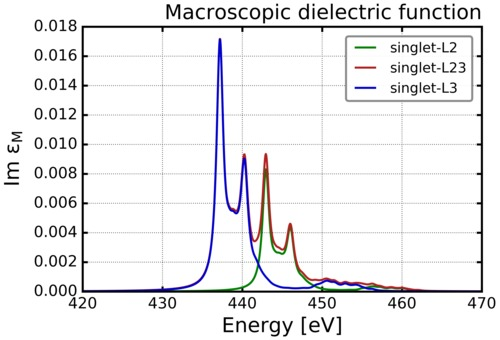" width="500" align="left"/>
</div>
</details>  
<hr style="border:1px solid #DDD"> </hr>

<hr style="border:2px solid #DDD"> </hr>